<a href="https://colab.research.google.com/github/albertorekena/education-improvement/blob/master/Pruebas_oversampling_Raul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
import xgboost

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN



from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error


from sklearn.decomposition import PCA
import statsmodels.regression.linear_model as smod


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#df_mat = pd.read_pickle('df_mat.pkl')

#df_mat.head()
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Cambiar variables a numéricas

In [3]:
df_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
# Variables binarias con valores varios
df_mat['school'] = df_mat['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_mat['sex'] = df_mat['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_mat['address'] = df_mat['address'].apply(lambda x: 1 if x == 'U' else 0)
df_mat['famsize'] = df_mat['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_mat['Pstatus'] = df_mat['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [0]:
# Variables binarias con "yes", "no"
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_mat[v] = df_mat[v].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
df_mat.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


In [0]:
df_mat_one_hot = one_hot(df_mat, ["Mjob", "Fjob", "reason", "guardian"])
#quitar columnas originales (categóricas)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob", "Fjob", "reason", "guardian"])
#quitar una columna de one hot de cada una de las variables para reducir la colinearidad (hace falta ver 
#cuál se quiere quitar en cada caso)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob_health", "Fjob_health", "guardian_other", "reason_other"])

In [10]:
df_mat_one_hot

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,0,0,1,0,0,1,0,0,0,1


In [11]:
df_mat_one_hot.shape

(395, 42)

In [0]:
df_mat_one_hot = df_mat_one_hot.drop(columns = ["G1", "G2"])

In [13]:
df_mat_one_hot.drop(columns = ["G3"]).columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother'],
      dtype='object')

# Quitar los 0's y reemplazarlos por la media de G1 y G2

In [0]:
df_mat["G12"] = (df_mat["G1"]+df_mat["G2"])/2


In [0]:
df_mat['G3New'] = np.where((df_mat['G3'] == 0 ), #For rows with G3 == 0 
                           df_mat['G12'].apply(np.floor),      #We place rounded down "G12" values
                           df_mat['G3'])      #In column "G3"

In [0]:
df_mat_one_hot["G3"] = df_mat["G3New"]

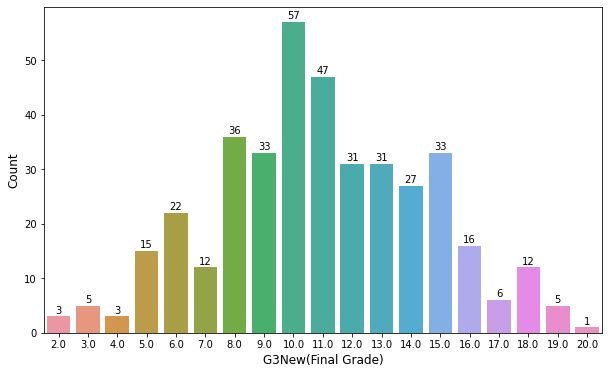

In [17]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3New'])
plt.xlabel('G3New(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [18]:
#Llegados a este punto, df_mat_one_hot contiene la base de datos sin G1, G2, y con las variables categóricas 
#pasadas a numéricas mediante one_hot. 
#Además, los 0 de G3 han sido sustituidos por la media entre G1 y G2 para normalizar la curva

df_mat_one_hot.shape

(395, 40)

# Probar con rangos de notas


In [0]:
#Introducir el número de rangos deseados
n_bags = 5
df_mat_one_hot.loc[df_mat_one_hot['G3'] <= 4,'G3Bagged'] = 1
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 4) & (df_mat_one_hot['G3'] <= 8),'G3Bagged'] = 2
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 8) & (df_mat_one_hot['G3'] <= 12),'G3Bagged'] = 3
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 12) & (df_mat_one_hot['G3'] <= 16),'G3Bagged'] = 4
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 16) & (df_mat_one_hot['G3'] <= 20),'G3Bagged'] = 5
df_mat["G3Bagged"] = df_mat_one_hot["G3Bagged"]

In [0]:
scalefactor =20/n_bags
#df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: x/scalefactor)
#df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: math.floor((x+1)/scalefactor))


#df_mat_one_hot["G3Bagged"] = df_mat["G3Bagged"]

In [21]:

# Define our dependent variable

y_column = 'G3Bagged'
y = df_mat_one_hot[y_column]
# Define  our independent variables
#x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
x_columns = df_mat_one_hot.drop(columns = ["G3", "G3Bagged"]).columns
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1Bagged = smod.OLS(endog = y_train,exog = X_train).fit()
print(scalefactor, model1Bagged.rsquared)
#print(model1Bagged.summary())

4.0 0.9414552270011668


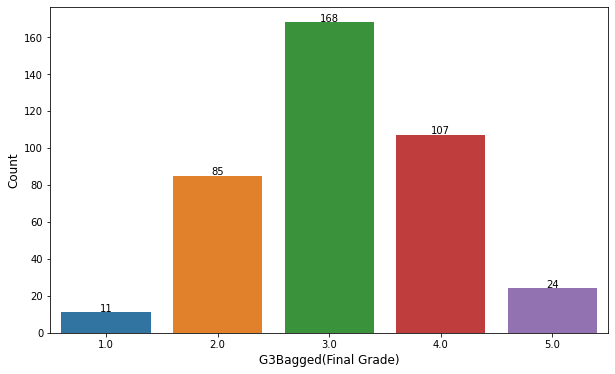

In [22]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3Bagged'])
plt.xlabel('G3Bagged(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [23]:
y_pred_test = model1Bagged.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 0.8501


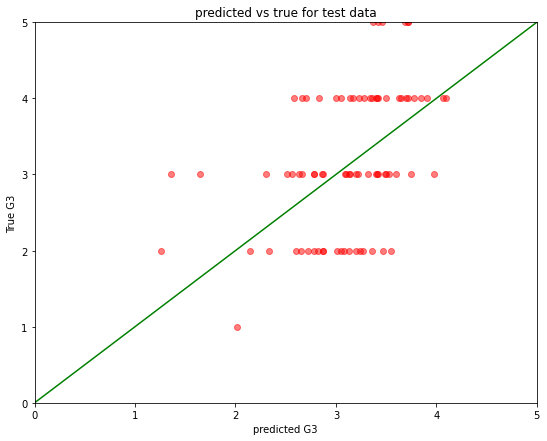

In [24]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [25]:
y_pred_test_bagged = y_pred_test.apply(lambda x: round(x))
y_test_bagged = y_test.apply(lambda x: round(x))
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test_bagged,y_pred_test_bagged)):.4}')


root mean squared error on test data: 0.9001


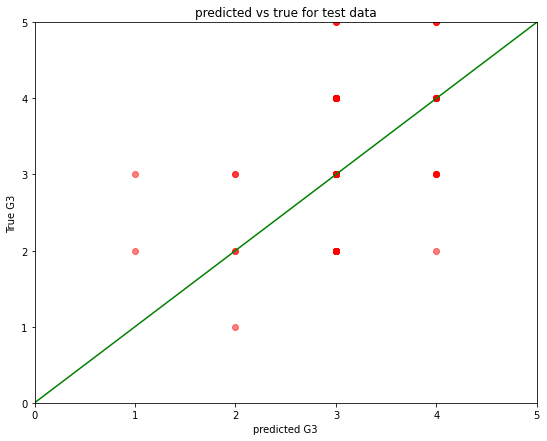

In [26]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_bagged, y_test_bagged, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [27]:
y_pred_test.describe()

count    79.000000
mean      3.120815
std       0.560222
min       1.261166
25%       2.805764
50%       3.204928
75%       3.477075
max       4.098948
dtype: float64

In [28]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,0,0,1,0,0,1,0,0,1,0,0,0,1


#Escalado

In [0]:
scaler = StandardScaler()

In [0]:
df_mat_one_hot_rescaled = scaler.fit_transform(df_mat_one_hot)

In [0]:
df_mat_one_hot_rescaled = pd.DataFrame(df_mat_one_hot_rescaled, columns = df_mat_one_hot.columns)

In [0]:
#df_mat_one_hot_rescaled = df_mat_one_hot

#Oversampling con Random OverSampler (ROS)

In [33]:
#Empezamos con el database df_mat_one_hot_rescaled
df_mat_one_hot_rescaled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,G3Bagged
0,0.36305,0.948176,1.023046,0.535392,0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.391857,2.386402,-0.745062,-0.593919,-0.414858,-0.23094,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.601722,-0.543214,0.668496,-1.234199
1,0.36305,0.948176,0.238380,0.535392,0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.391857,2.386402,-0.745062,-0.593919,-0.414858,-0.23094,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.601722,1.840894,-1.495896,-1.234199
2,0.36305,0.948176,-1.330954,0.535392,-1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-0.271565,2.386402,-0.745062,-0.593919,-0.414858,-0.23094,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,-0.601722,-0.543214,0.668496,-0.133728
3,0.36305,0.948176,-1.330954,0.535392,0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.128801,-0.419041,-0.745062,-0.593919,-0.414858,-0.23094,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.601722,-0.543214,0.668496,0.966743
4,0.36305,0.948176,-0.546287,0.535392,0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-0.271565,-0.419041,1.342169,-0.593919,-0.414858,-0.23094,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.601722,1.840894,-1.495896,-0.133728


In [0]:
ros = RandomOverSampler(random_state=42)

In [0]:
#Parece que el rescaled pierde los nombres de variables, asi que de momento con el antiguo

y_column = 'G3Bagged'
y = df_mat_one_hot_rescaled[y_column]
# Define  our independent variables
#x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
x_columns = df_mat_one_hot_rescaled.drop(columns = ["G3", "G3Bagged"]).columns
X = df_mat_one_hot_rescaled[x_columns]
X_resampled, y_resampled = ros.fit_resample(X, y)

In [36]:
print(X_resampled.shape, y_resampled.shape, X.shape, y.shape)

(840, 39) (840,) (395, 39) (395,)


In [0]:
X_std = X_resampled
y_std = y_resampled

## G3 tras oversampling

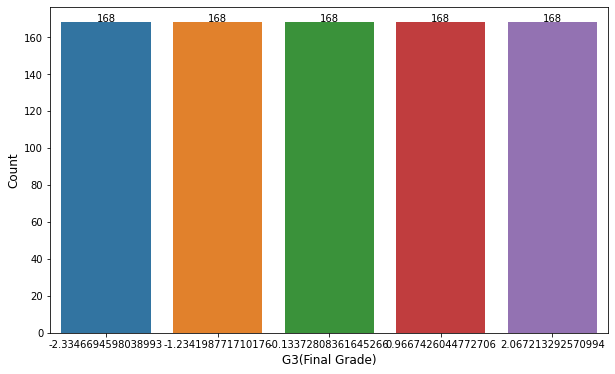

In [38]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_resampled)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

## Silhouetting (KMeans) tras ROS

For n_clusters = 2 The average silhouette_score is : 0.07174467617810484
For n_clusters = 3 The average silhouette_score is : 0.08381465810256733
For n_clusters = 4 The average silhouette_score is : 0.09297631800083281
For n_clusters = 5 The average silhouette_score is : 0.09551953057113735
For n_clusters = 6 The average silhouette_score is : 0.09725975559653191
For n_clusters = 7 The average silhouette_score is : 0.10120533855424173
For n_clusters = 8 The average silhouette_score is : 0.10869989847727154
For n_clusters = 9 The average silhouette_score is : 0.11804090026169839
For n_clusters = 10 The average silhouette_score is : 0.13174306684843284
For n_clusters = 11 The average silhouette_score is : 0.12391468616512988


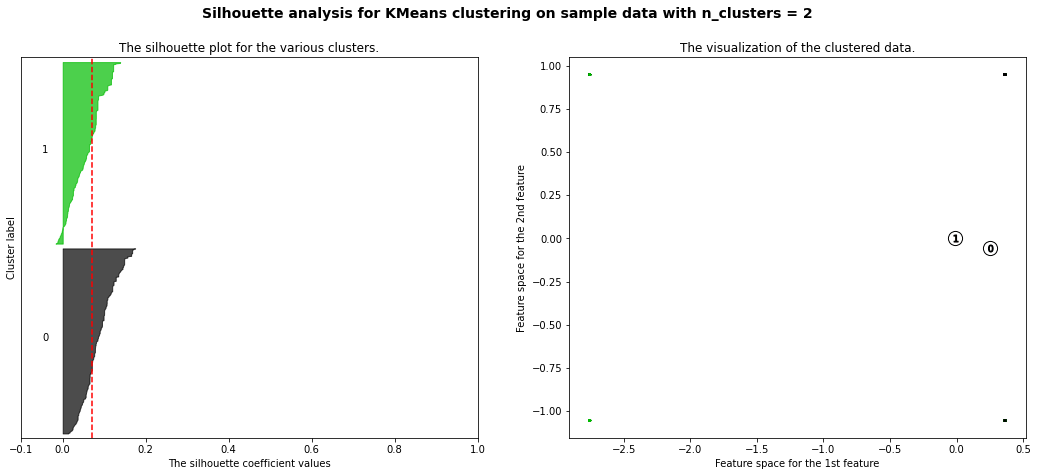

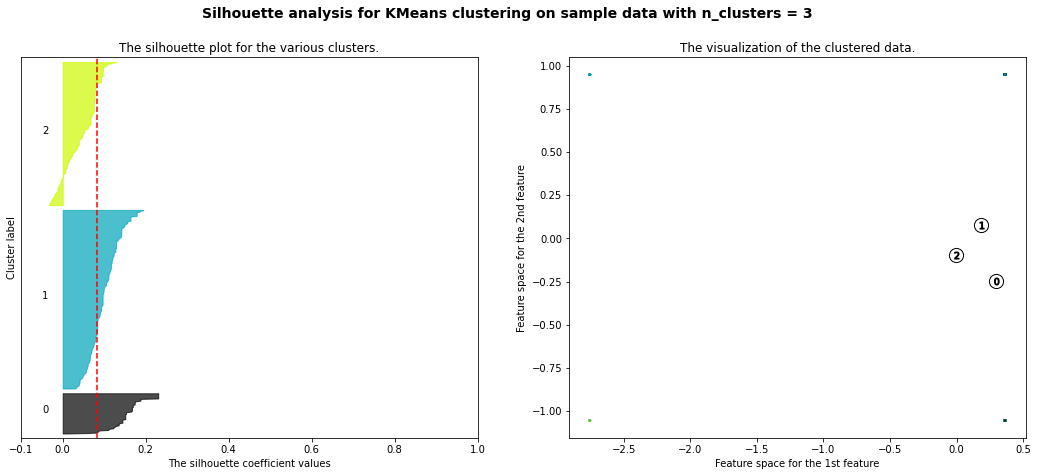

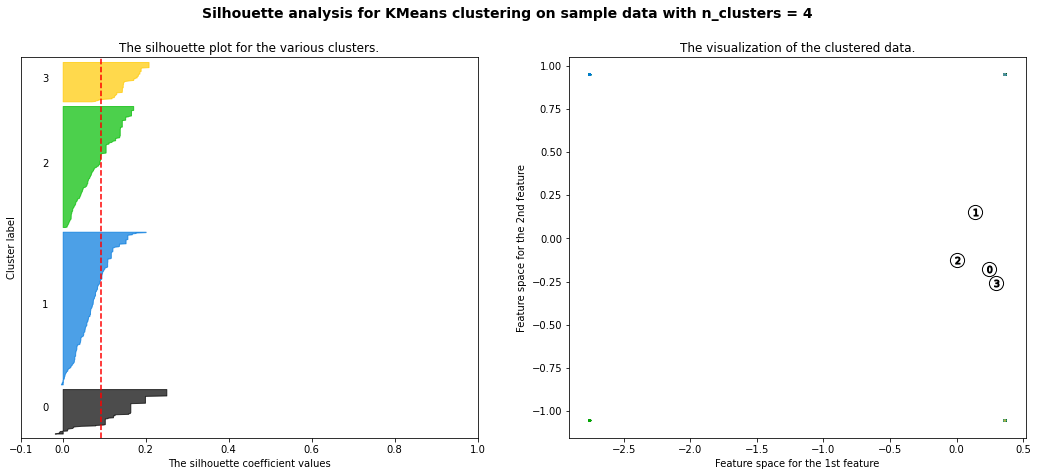

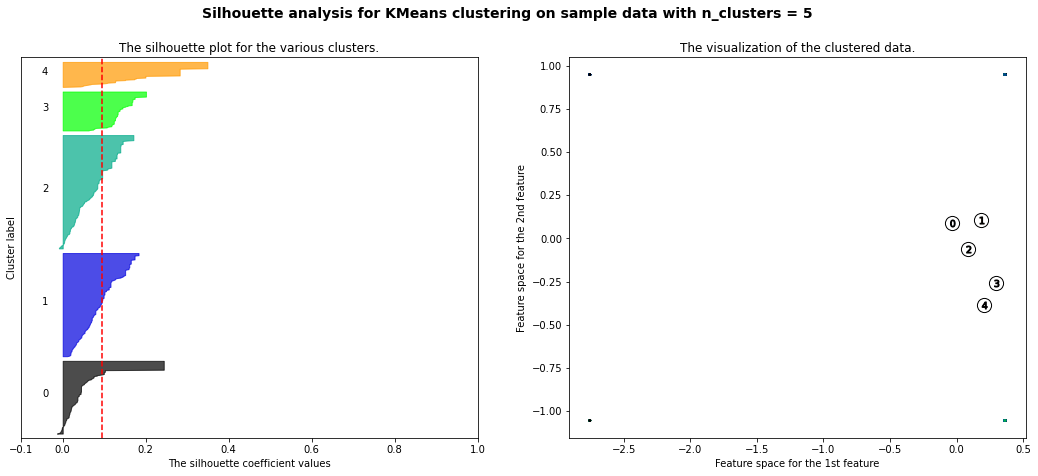

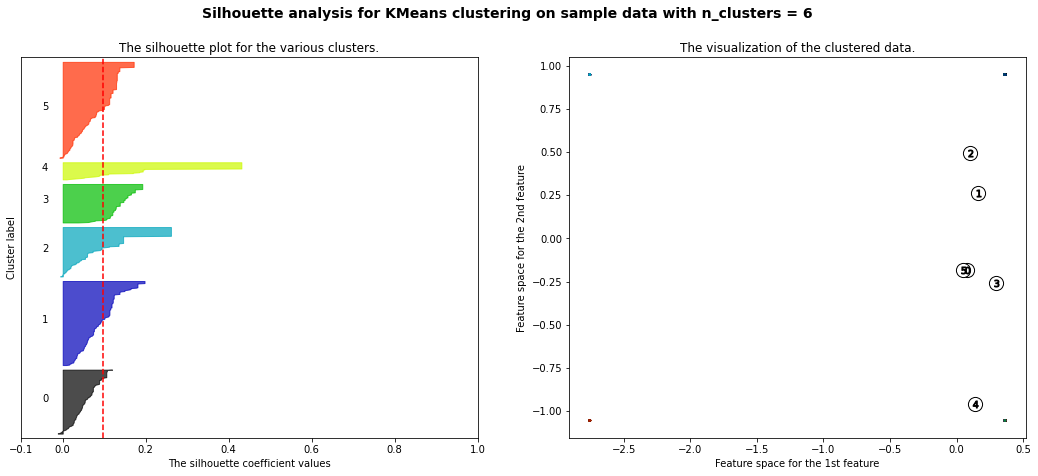

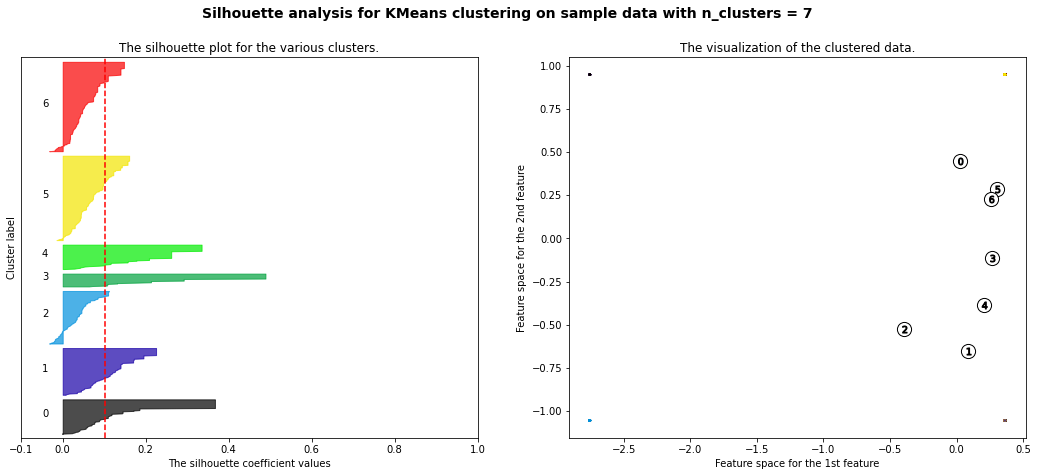

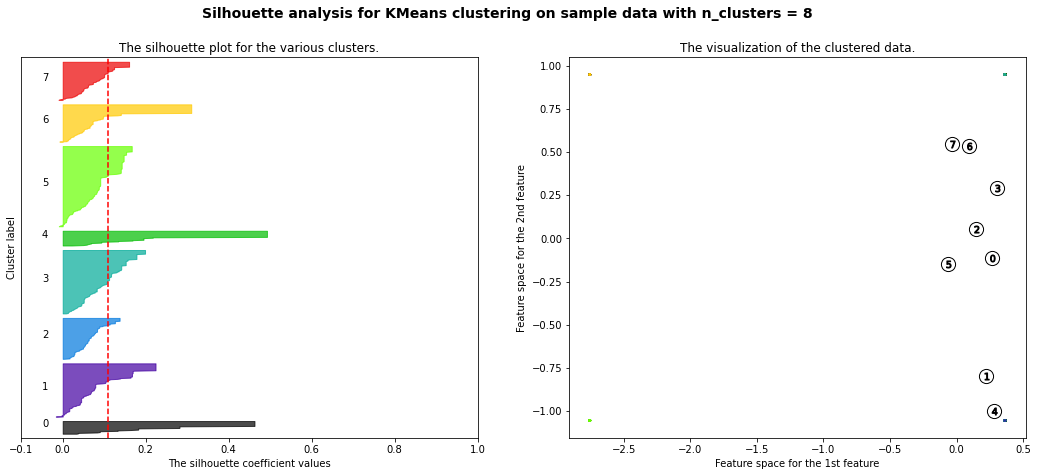

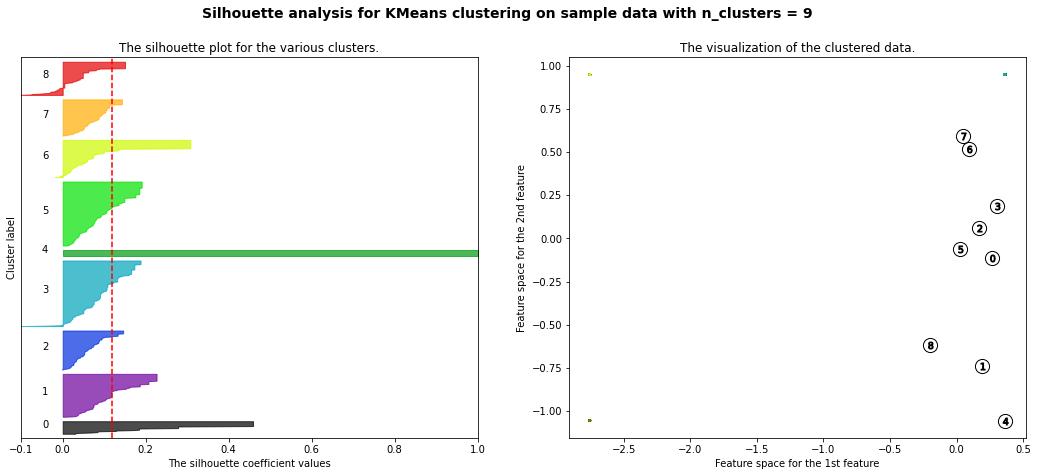

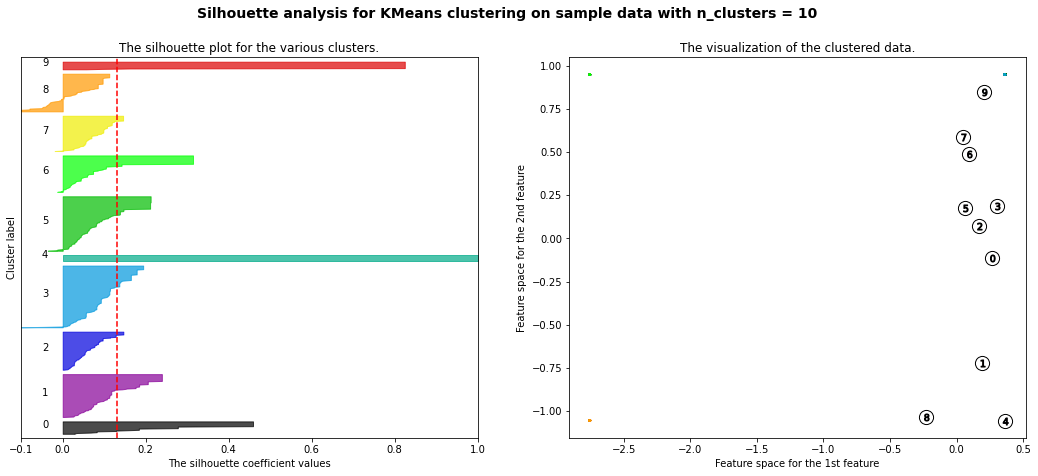

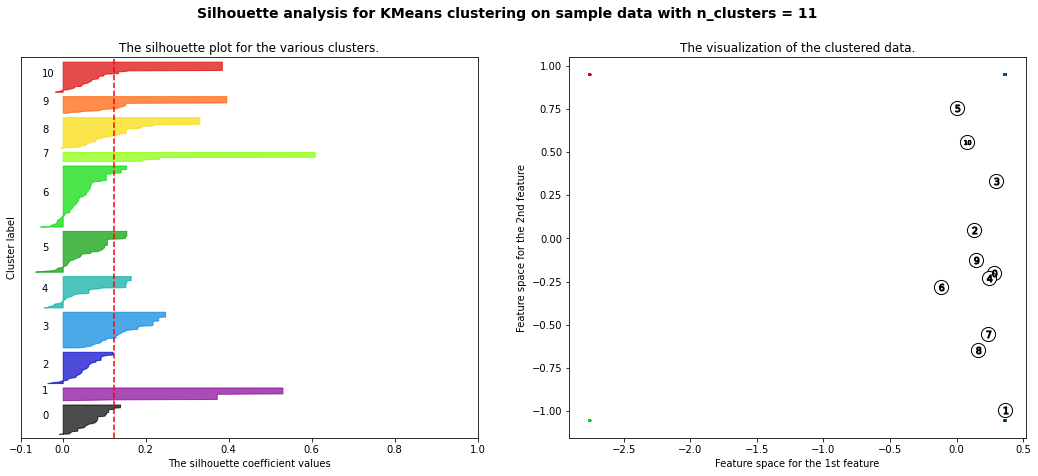

In [39]:
#Silhouette plots

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        #X_std.iloc[:,0], X_std.iloc[:, 1],
        X_std[:, 0], X_std[:, 1], 
        marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [40]:
#Code to plot the graph of silhouette values

range_n_clusters = range(2,12)
silhouette_list = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    silhouette_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Create a subplot with 1 row and 2 columns
print(silhouette_list)

#fig = plt.scatter()
#ax = plt.axes()
#fig, ax = plt.figure(1,1)
#fig.set_size_inches(18, 7)
#fig.xlim(2,20)
#x = np.linspace(0, 10, 1000)
#ax.plot(n_clusters, silhouette_list[n_clusters],color = 'g',linewidth = 5);

For n_clusters = 2 The average silhouette_score is : 0.07174467617810484
For n_clusters = 3 The average silhouette_score is : 0.08381465810256733
For n_clusters = 4 The average silhouette_score is : 0.09297631800083281
For n_clusters = 5 The average silhouette_score is : 0.09551953057113735
For n_clusters = 6 The average silhouette_score is : 0.09725975559653191
For n_clusters = 7 The average silhouette_score is : 0.10120533855424173
For n_clusters = 8 The average silhouette_score is : 0.10869989847727154
For n_clusters = 9 The average silhouette_score is : 0.11804090026169839
For n_clusters = 10 The average silhouette_score is : 0.13174306684843284
For n_clusters = 11 The average silhouette_score is : 0.12391468616512988
[0.07174467617810484, 0.08381465810256733, 0.09297631800083281, 0.09551953057113735, 0.09725975559653191, 0.10120533855424173, 0.10869989847727154, 0.11804090026169839, 0.13174306684843284, 0.12391468616512988]


In [41]:
range_list = list(range_n_clusters)

for i in range(len(range_list)):
  print(range_list[i], silhouette_list[i])
print(len(range_list), len(silhouette_list))

2 0.07174467617810484
3 0.08381465810256733
4 0.09297631800083281
5 0.09551953057113735
6 0.09725975559653191
7 0.10120533855424173
8 0.10869989847727154
9 0.11804090026169839
10 0.13174306684843284
11 0.12391468616512988
10 10


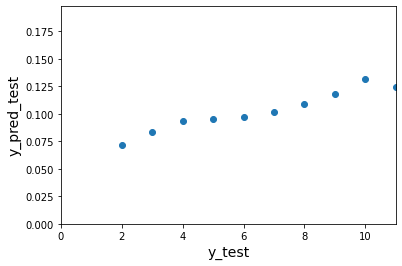

In [42]:
plt.scatter(range_list,silhouette_list)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,len(range_list)+1)
plt.ylim(0,max(silhouette_list)*1.5)
y_lim = plt.ylim()
x_lim = plt.xlim()
for i in range(len(range_list)):
  plt.plot(range_list[i], silhouette_list[i],color = 'g',linewidth = 5);


## Visualización clusters KMeans

In [92]:
for i in range(2,12):
  print(i)

2
3
4
5
6
7
8
9
10
11


n_clusters = 2
n_clusters = 3
n_clusters = 4
n_clusters = 5
n_clusters = 6
n_clusters = 7
n_clusters = 8
n_clusters = 9
n_clusters = 10
n_clusters = 11


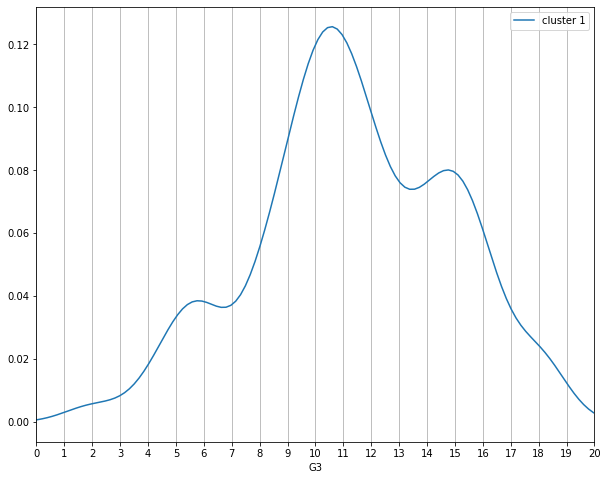

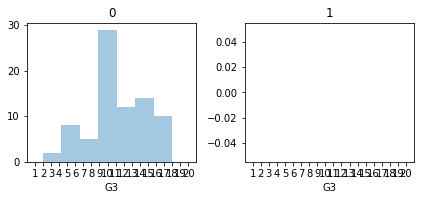

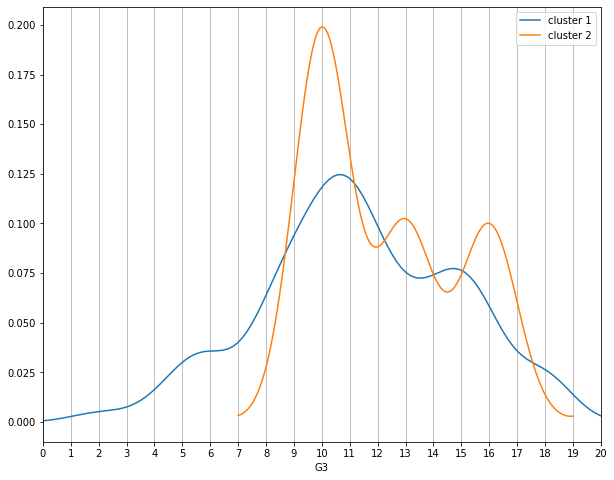

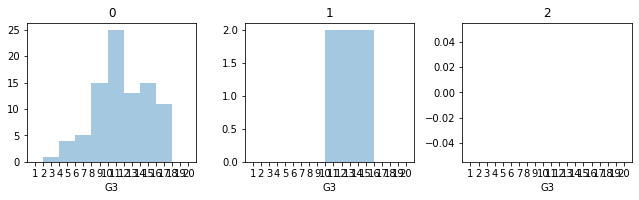

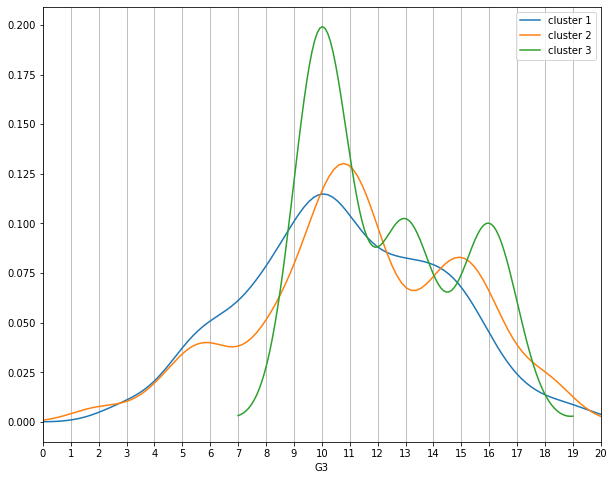

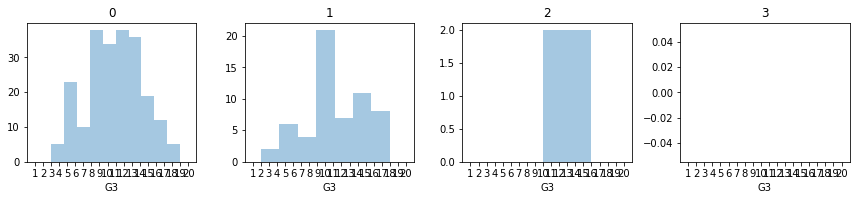

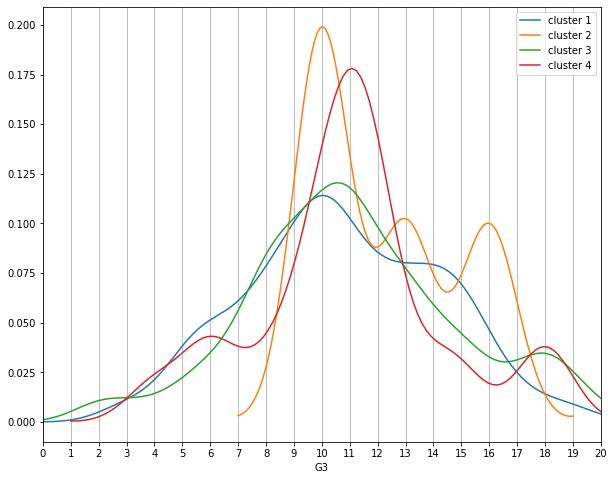

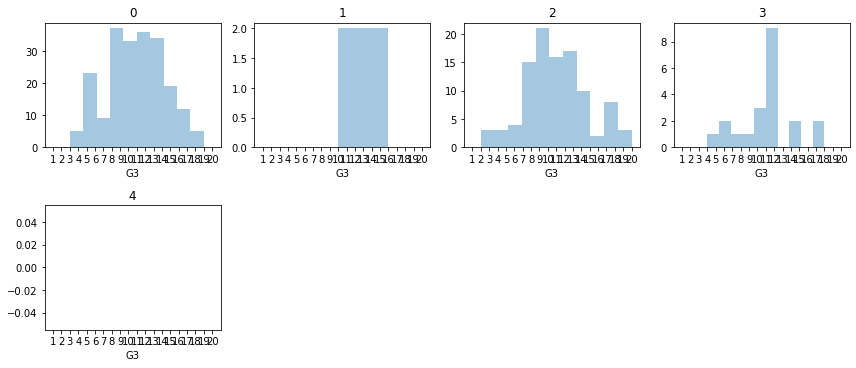

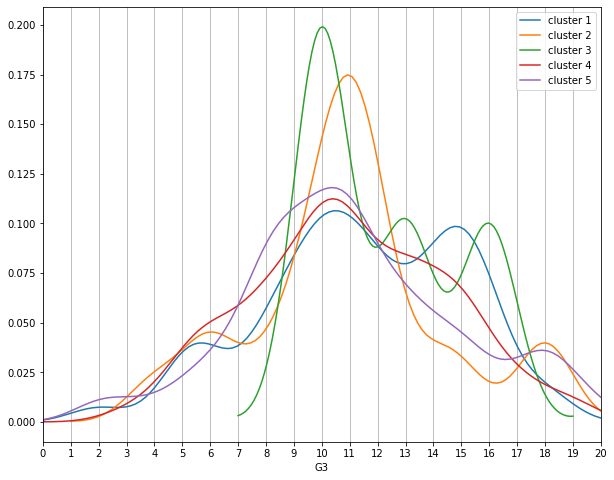

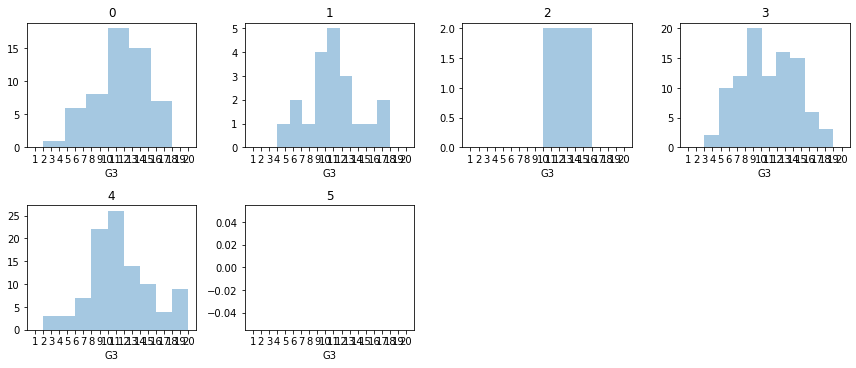

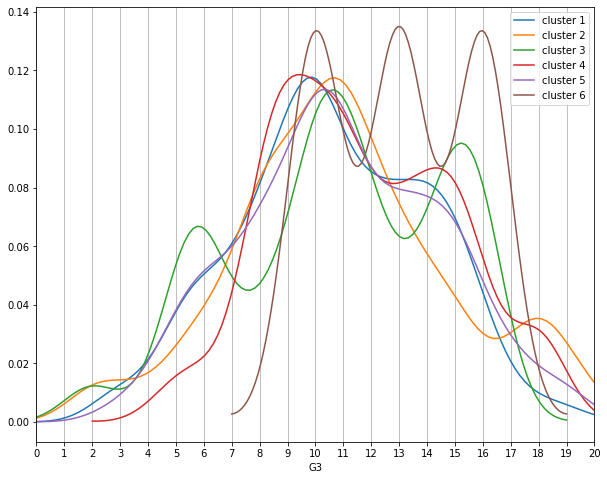

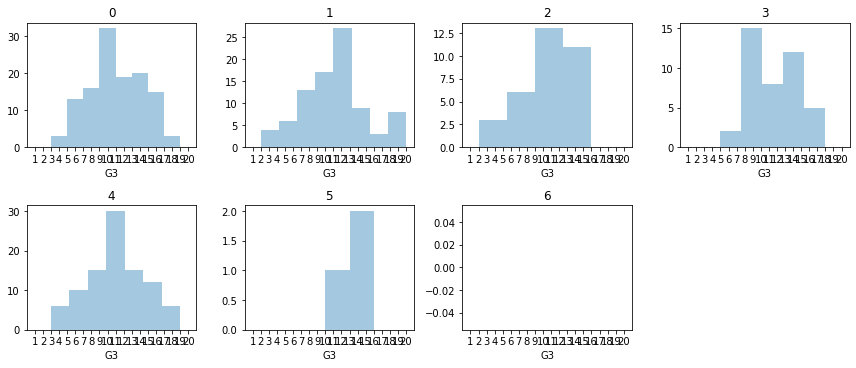

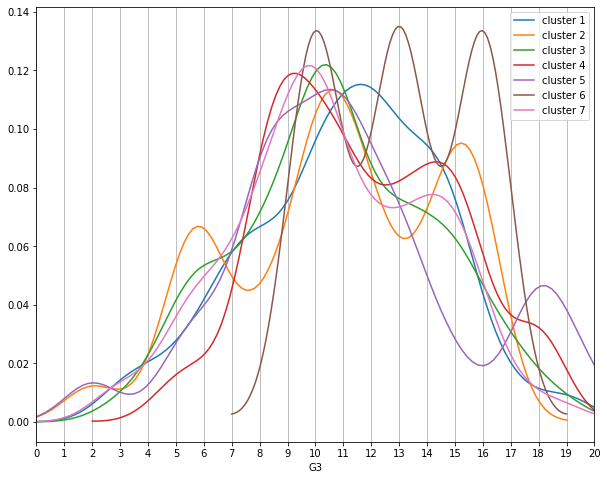

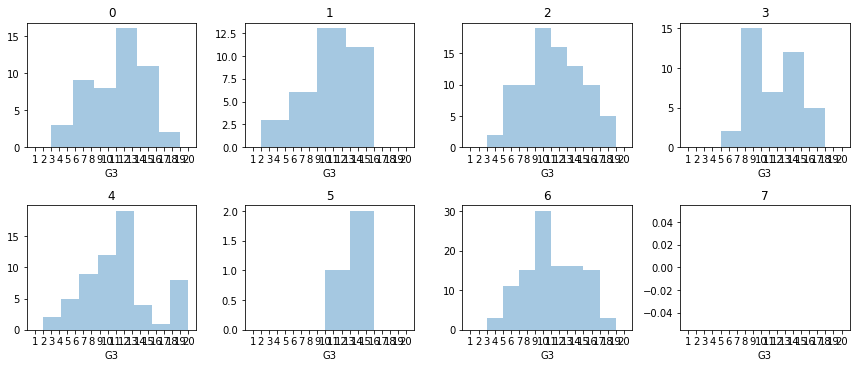

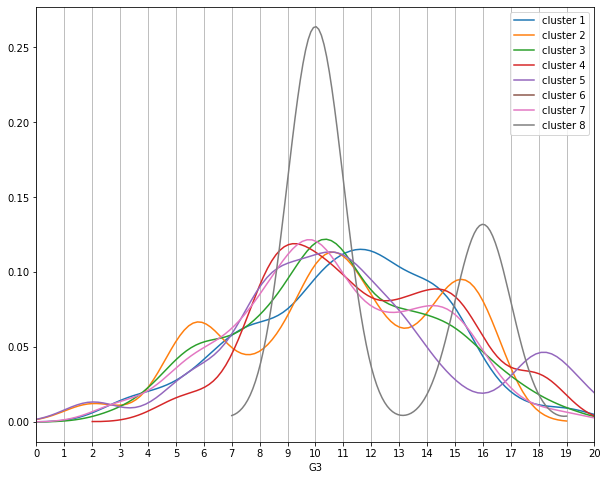

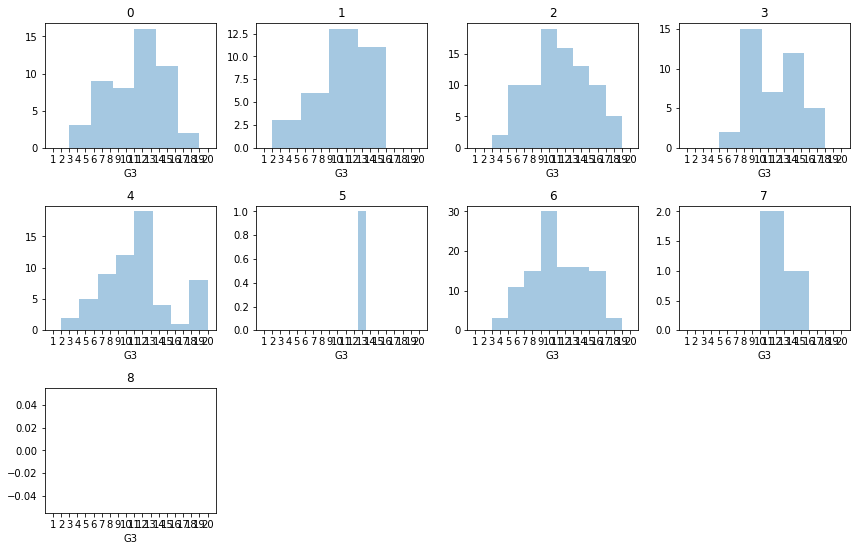

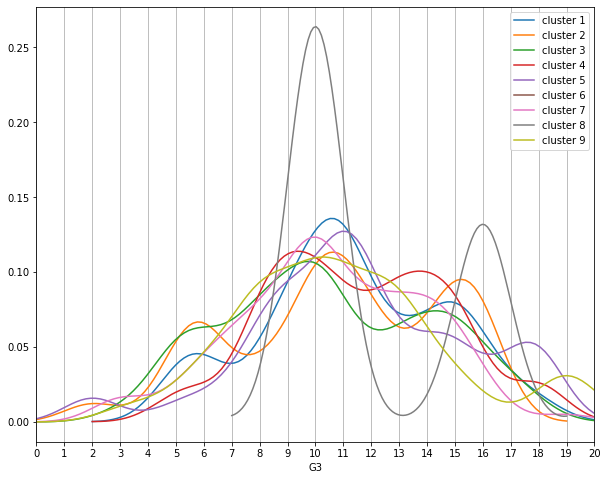

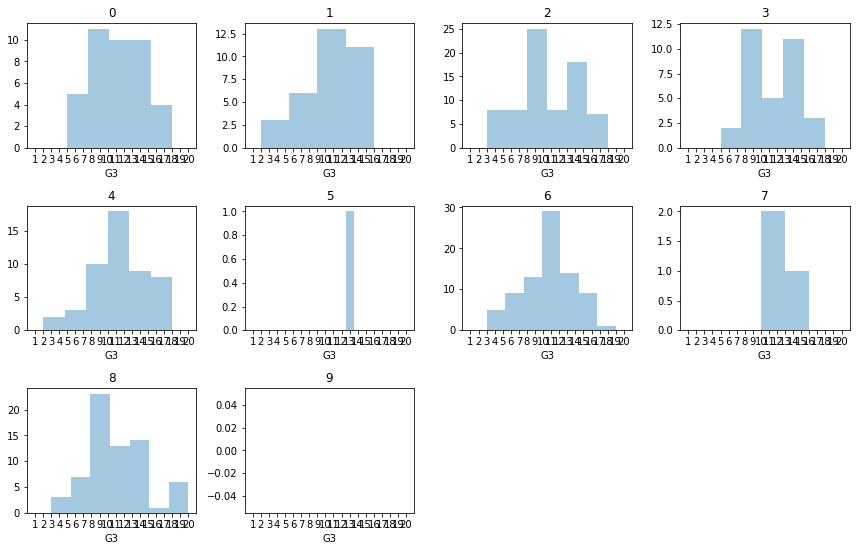

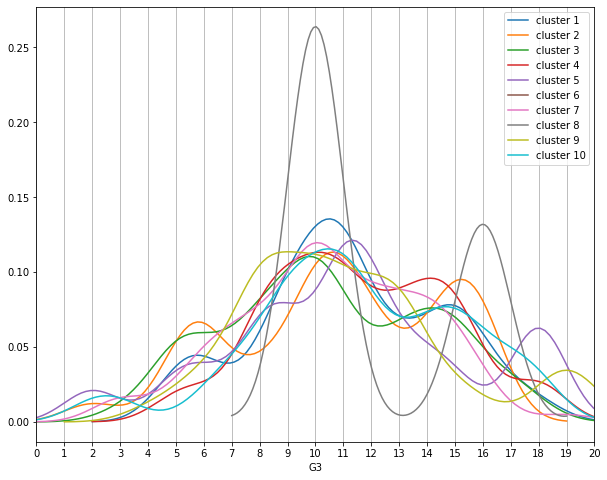

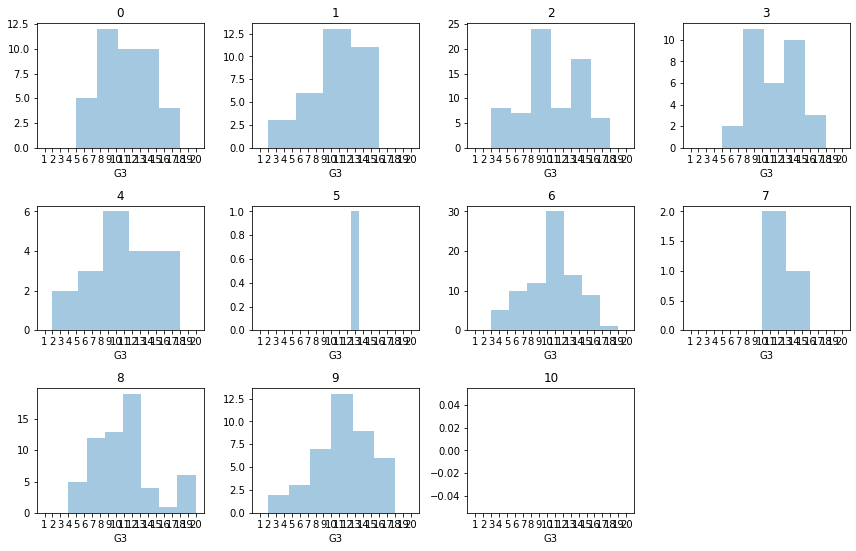

In [95]:
#Silhouette plots

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    
    
    y_KMclusters = pd.DataFrame(cluster_labels)

    y_KMclusters.columns = ['cluster']
    
    df_mat_one_hot_KMclusters = pd.concat([df_mat_one_hot,y_KMclusters],axis = 1)

    #print(df_mat_one_hot_KMclusters.head())

    #print(df_mat_one_hot_KMclusters['cluster'].value_counts().sort_index())
   
    df_mat_one_hot_KMclusters = one_hot(df_mat_one_hot_KMclusters, ["cluster"])


    df_mat_one_hot_sepclusters = []
    for i in range(1,n_clusters+1):
      df_mat_one_hot_sepclusters.append(df_mat_one_hot_KMclusters[df_mat_one_hot_KMclusters['cluster'] == i])
    #print(len(df_mat_one_hot_sepclusters))
    df_mat_one_hot_sepclusters[0]["G3"]

    print("n_clusters = {}".format(n_clusters))
    fig = plt.figure(figsize = (10,8))

    ax = fig.gca()
    for i in range(len(df_mat_one_hot_sepclusters)):
      sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,20),label = 'cluster {}'.format(i+1))
    sns.distplot
    plt.xticks(np.arange(0,21))
    plt.xlim(0,20)
    ax.xaxis.grid(True)
    plt.legend();

    fig = plt.figure(figsize = (12,20))

    for i in range(len(df_mat_one_hot_sepclusters)):
    
      plt.subplot(8,4,i+1)
      ax = plt.gca()
      ax.set_title(i,fontsize = 12)
      ax.tick_params(axis = 'x')
      n_unique_values = 21


      sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],kde = False) #,fit = norm)
      plt.xticks(np.arange(1,21,1))
      plt.xlim(0,21);
    
    #plt.hist(df_por_histograms.iloc[:,i - 1],bins = n_unique_values)
      fig.tight_layout();




#Oversampling con SMOTE

In [0]:
#Parece que el rescaled pierde los nombres de variables, asi que de momento con el antiguo

y_column = 'G3Bagged'
y = df_mat_one_hot_rescaled[y_column]
# Define  our independent variables
#x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
x_columns = df_mat_one_hot_rescaled.drop(columns = ["G3", "G3Bagged"]).columns
X = df_mat_one_hot_rescaled[x_columns]


In [45]:
#Empezamos con el database df_mat_one_hot_rescaled
df_mat_one_hot_rescaled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,G3Bagged
0,0.36305,0.948176,1.023046,0.535392,0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.391857,2.386402,-0.745062,-0.593919,-0.414858,-0.23094,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.601722,-0.543214,0.668496,-1.234199
1,0.36305,0.948176,0.238380,0.535392,0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.391857,2.386402,-0.745062,-0.593919,-0.414858,-0.23094,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.601722,1.840894,-1.495896,-1.234199
2,0.36305,0.948176,-1.330954,0.535392,-1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-0.271565,2.386402,-0.745062,-0.593919,-0.414858,-0.23094,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,-0.601722,-0.543214,0.668496,-0.133728
3,0.36305,0.948176,-1.330954,0.535392,0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.128801,-0.419041,-0.745062,-0.593919,-0.414858,-0.23094,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.601722,-0.543214,0.668496,0.966743
4,0.36305,0.948176,-0.546287,0.535392,0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-0.271565,-0.419041,1.342169,-0.593919,-0.414858,-0.23094,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.601722,1.840894,-1.495896,-0.133728


In [46]:
df_mat_one_hot_rescaled["G3Bagged"].value_counts()

-0.133728    168
 0.966743    107
-1.234199     85
 2.067213     24
-2.334669     11
Name: G3Bagged, dtype: int64

In [47]:
y.value_counts()

-0.133728    168
 0.966743    107
-1.234199     85
 2.067213     24
-2.334669     11
Name: G3Bagged, dtype: int64

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [0]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from sklearn.svm import LinearSVC
#Parece que el rescaled pierde los nombres de variables, asi que de momento con el antiguo



y_column = 'G3Bagged'
y = df_mat_one_hot_rescaled[y_column]
# Define  our independent variables
#x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
x_columns = df_mat_one_hot_rescaled.drop(columns = ["G3", "G3Bagged"]).columns
X = df_mat_one_hot_rescaled[x_columns]
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
clf_smote = LinearSVC().fit(X_resampled, y_resampled)



In [0]:
#X_resampled, y_resampled = ADASYN().fit_resample(X, y)
#clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

In [51]:
print(X_resampled.shape, y_resampled.shape, X.shape, y.shape)

(705, 39) (705,) (395, 39) (395,)


In [0]:
X_std = X_resampled
y_std = y_resampled

## G3 tras oversampling

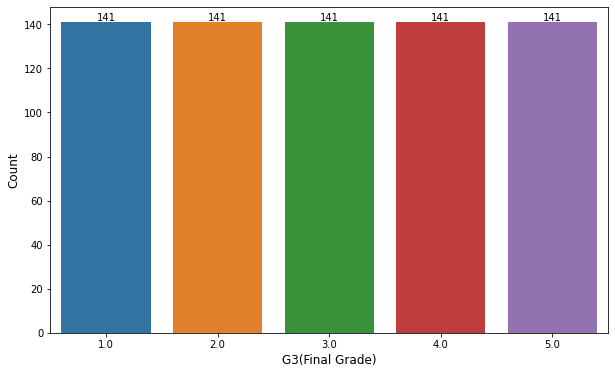

In [53]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_resampled)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

## Silhouetting (KMeans) tras SMOTE


For n_clusters = 2 The average silhouette_score is : 0.5293393723706606
For n_clusters = 3 The average silhouette_score is : 0.49991822081407084
For n_clusters = 4 The average silhouette_score is : 0.287560835560938
For n_clusters = 5 The average silhouette_score is : 0.24345096731655302
For n_clusters = 6 The average silhouette_score is : 0.1552966625795302
For n_clusters = 7 The average silhouette_score is : 0.14207309495503442
For n_clusters = 8 The average silhouette_score is : 0.13888530988923278
For n_clusters = 9 The average silhouette_score is : 0.13794449935922326
For n_clusters = 10 The average silhouette_score is : 0.1070653947194208
For n_clusters = 11 The average silhouette_score is : 0.10322407813197118


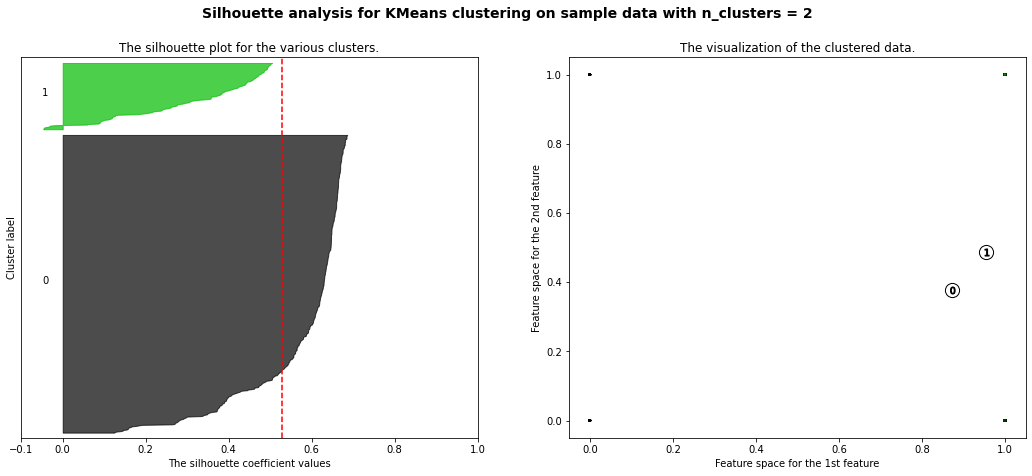

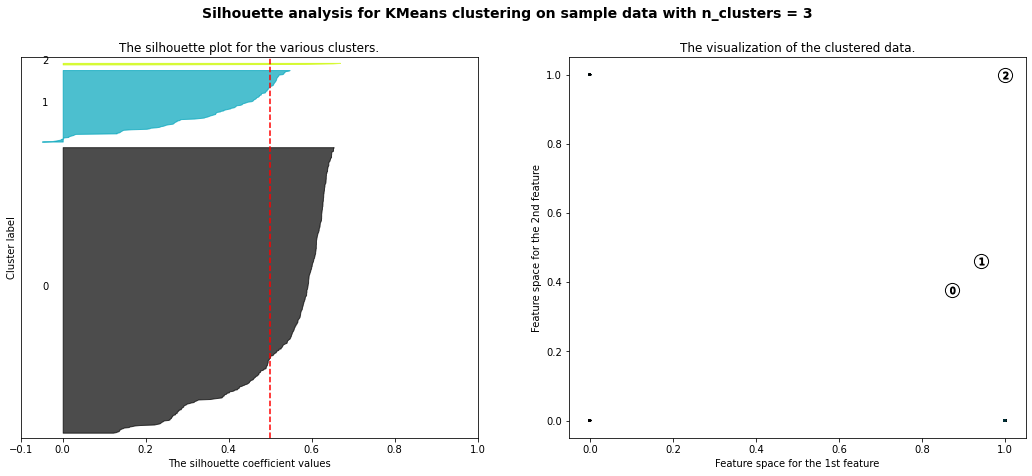

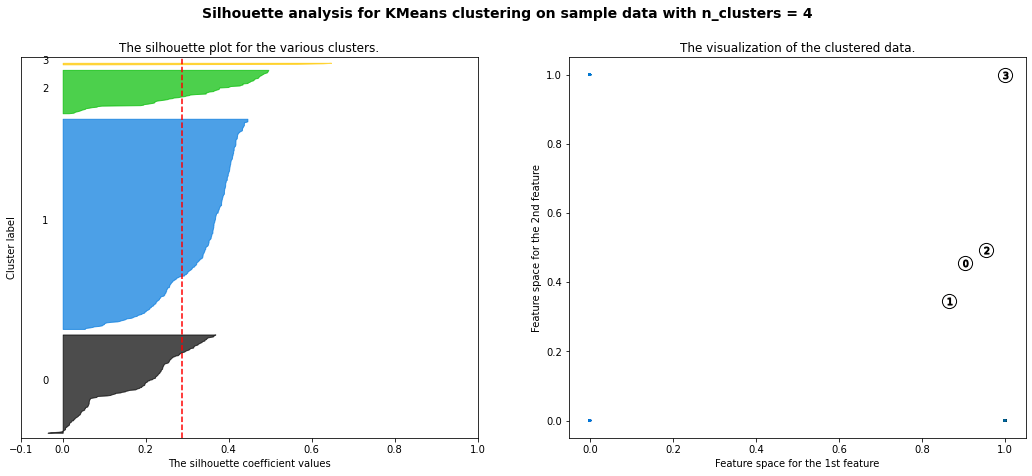

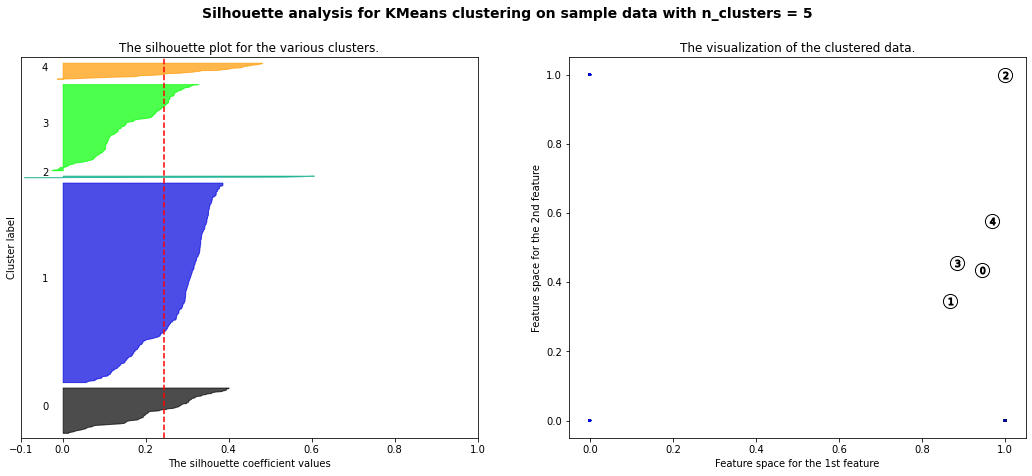

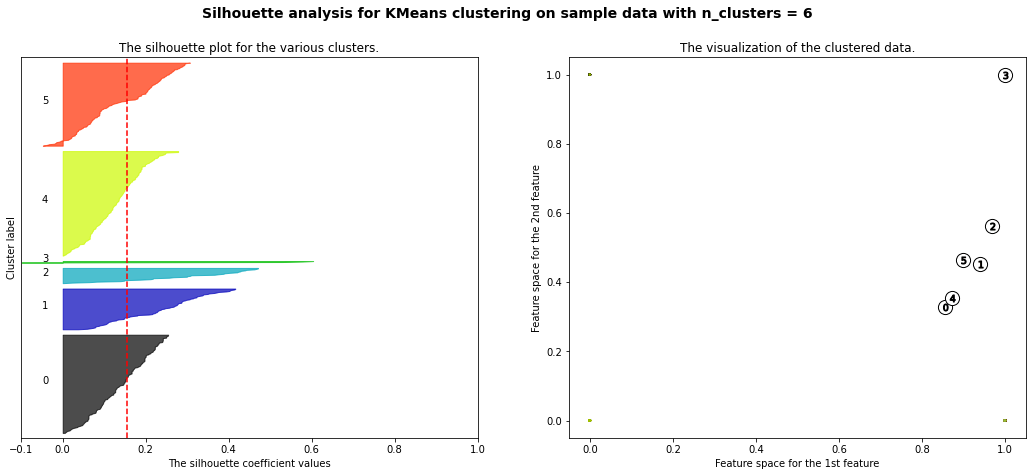

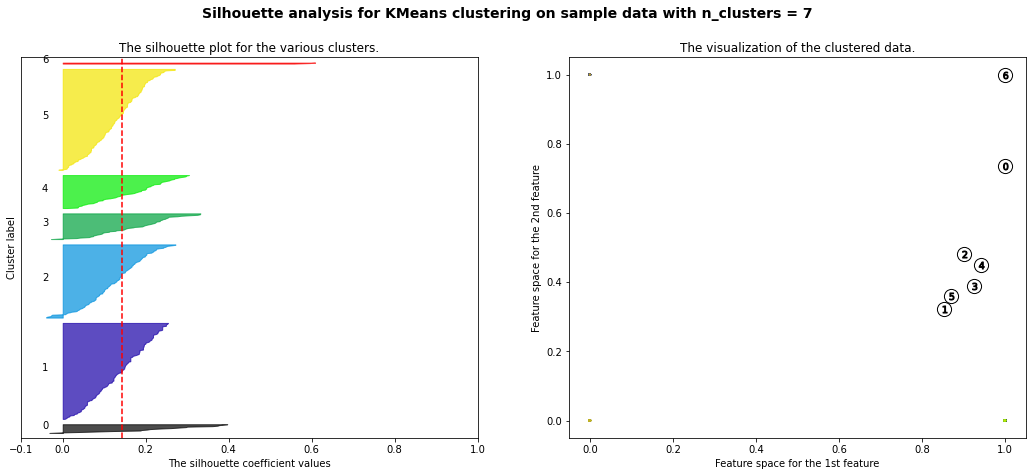

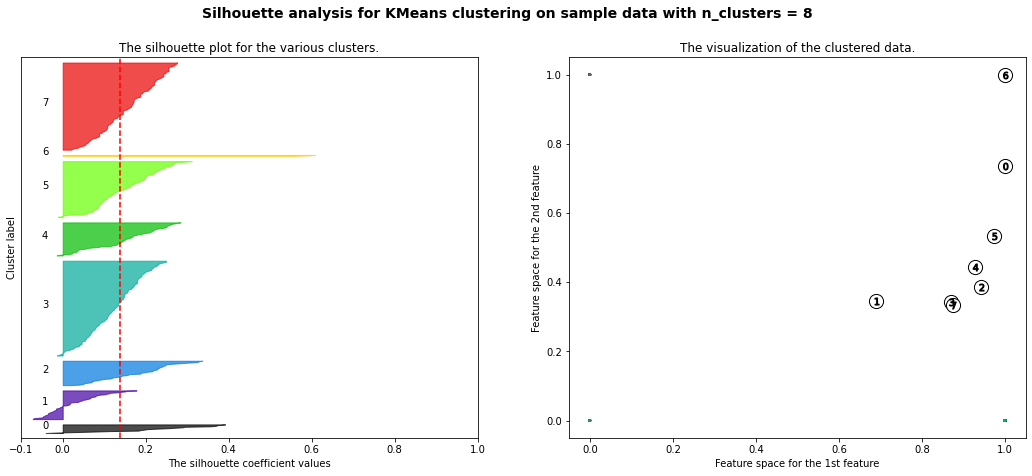

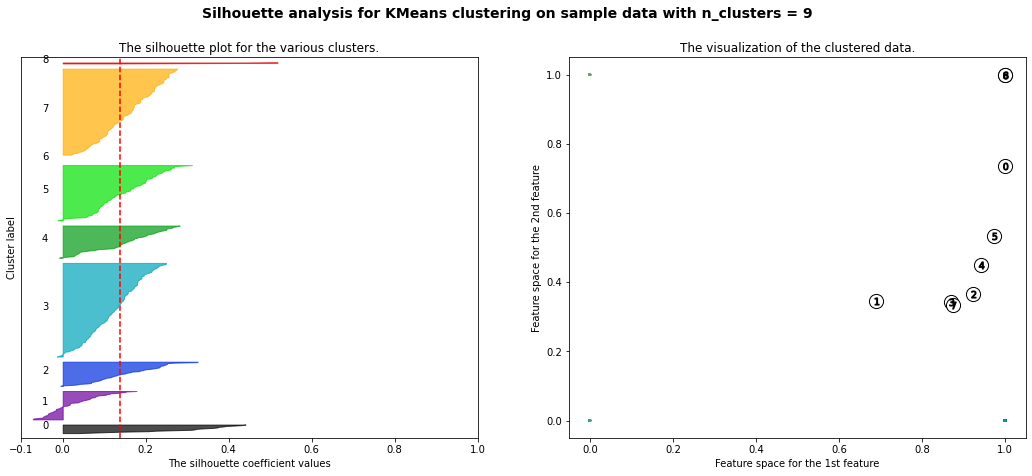

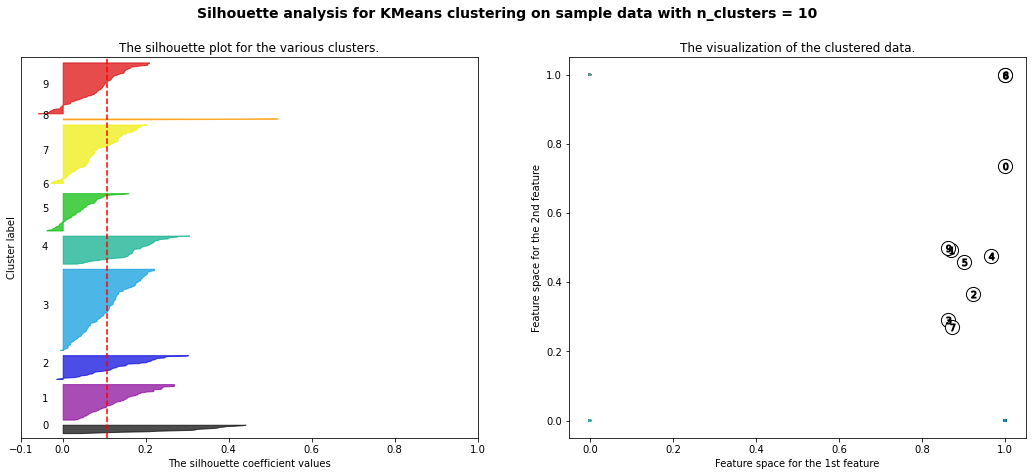

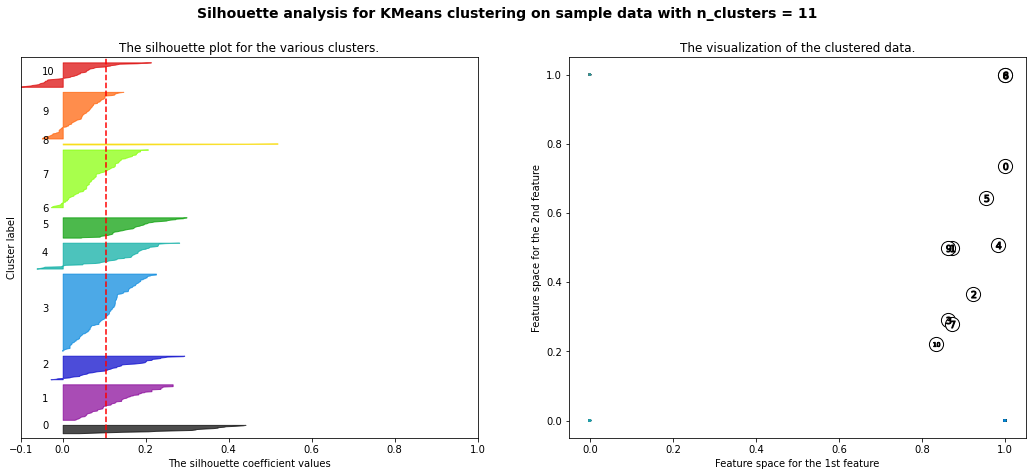

In [54]:
#Silhouette plots

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        #X_std.iloc[:,0], X_std.iloc[:, 1],
        X_std[:, 0], X_std[:, 1], 
        marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [55]:
#Code to plot the graph of silhouette values

range_n_clusters = range(2,12)
silhouette_list = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    silhouette_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Create a subplot with 1 row and 2 columns
print(silhouette_list)

#fig = plt.scatter()
#ax = plt.axes()
#fig, ax = plt.figure(1,1)
#fig.set_size_inches(18, 7)
#fig.xlim(2,20)
#x = np.linspace(0, 10, 1000)
#ax.plot(n_clusters, silhouette_list[n_clusters],color = 'g',linewidth = 5);

For n_clusters = 2 The average silhouette_score is : 0.5293393723706606
For n_clusters = 3 The average silhouette_score is : 0.49991822081407084
For n_clusters = 4 The average silhouette_score is : 0.287560835560938
For n_clusters = 5 The average silhouette_score is : 0.24345096731655302
For n_clusters = 6 The average silhouette_score is : 0.1552966625795302
For n_clusters = 7 The average silhouette_score is : 0.14207309495503442
For n_clusters = 8 The average silhouette_score is : 0.13888530988923278
For n_clusters = 9 The average silhouette_score is : 0.13794449935922326
For n_clusters = 10 The average silhouette_score is : 0.1070653947194208
For n_clusters = 11 The average silhouette_score is : 0.10322407813197118
[0.5293393723706606, 0.49991822081407084, 0.287560835560938, 0.24345096731655302, 0.1552966625795302, 0.14207309495503442, 0.13888530988923278, 0.13794449935922326, 0.1070653947194208, 0.10322407813197118]


In [56]:
range_list = list(range_n_clusters)

for i in range(len(range_list)):
  print(range_list[i], silhouette_list[i])
print(len(range_list), len(silhouette_list))

2 0.5293393723706606
3 0.49991822081407084
4 0.287560835560938
5 0.24345096731655302
6 0.1552966625795302
7 0.14207309495503442
8 0.13888530988923278
9 0.13794449935922326
10 0.1070653947194208
11 0.10322407813197118
10 10


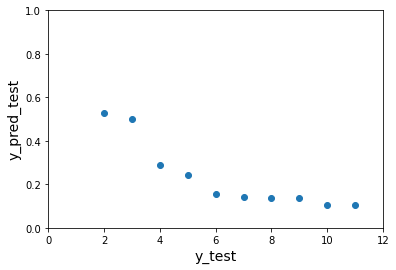

In [57]:
plt.scatter(range_list,silhouette_list)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,len(range_list)+2)
plt.ylim(0,1)
y_lim = plt.ylim()
x_lim = plt.xlim()
for i in range(len(range_list)):
  plt.plot(range_list[i], silhouette_list[i],color = 'g',linewidth = 5);


## Visualización clusters KMeans

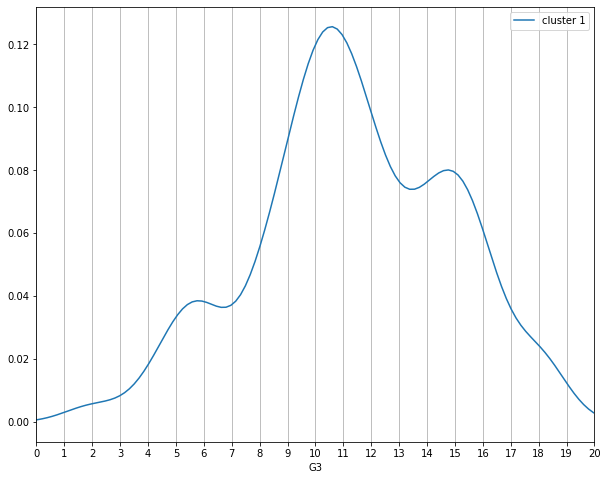

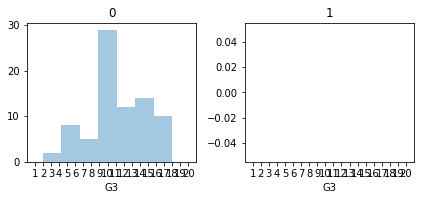

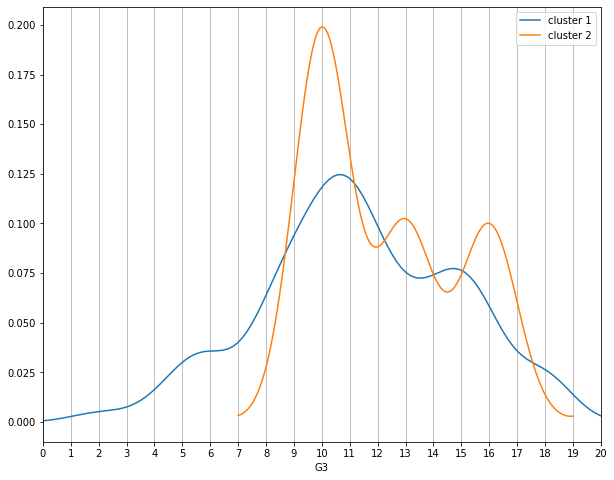

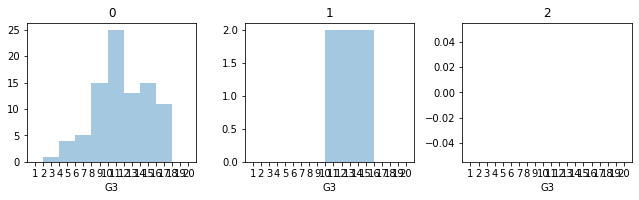

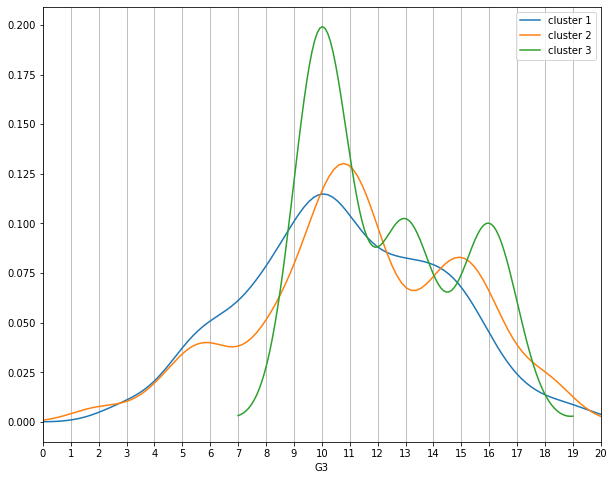

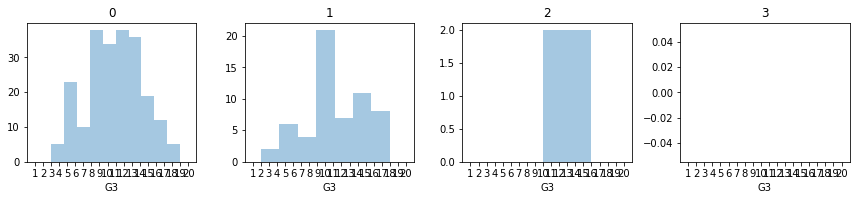

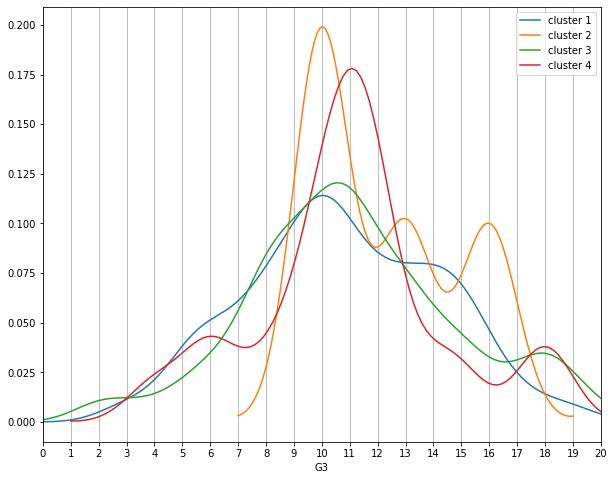

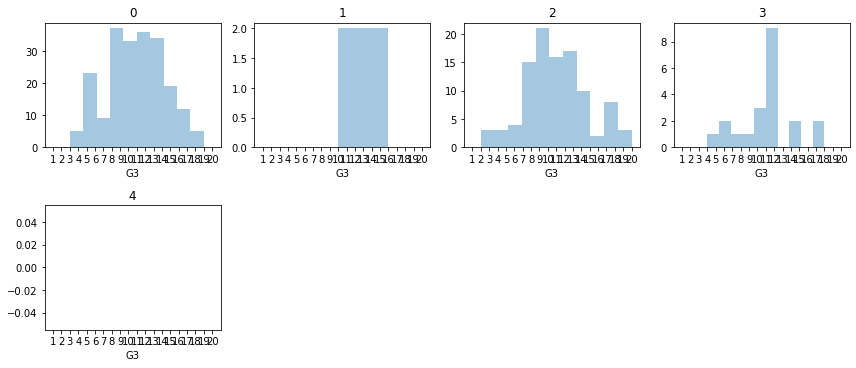

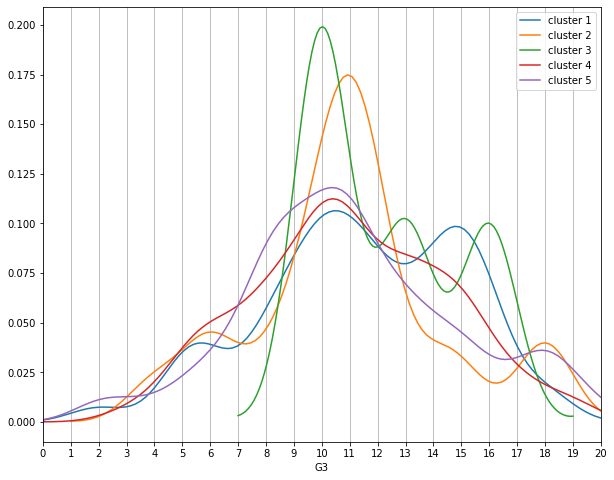

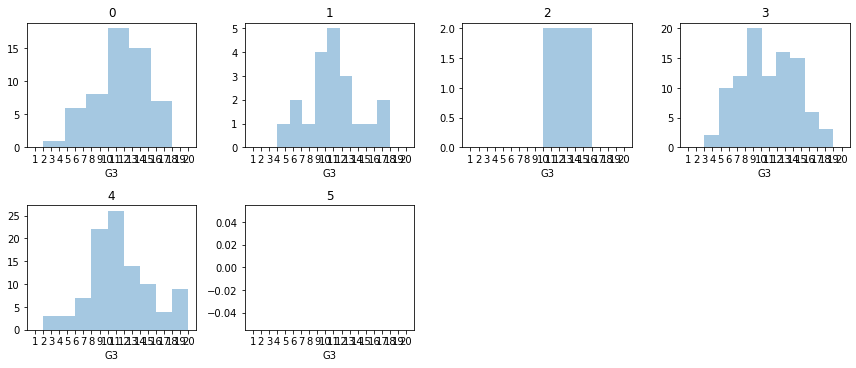

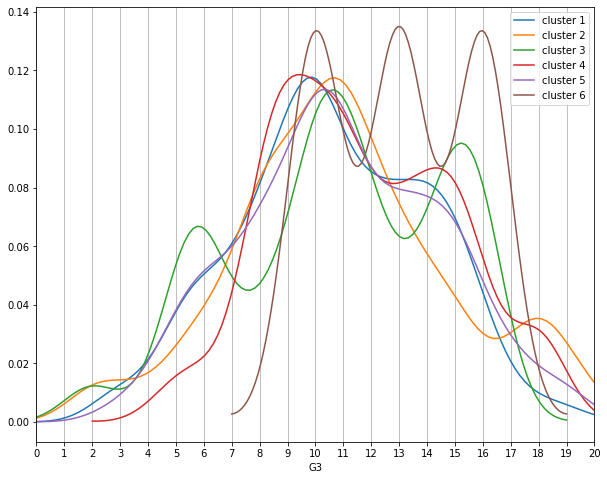

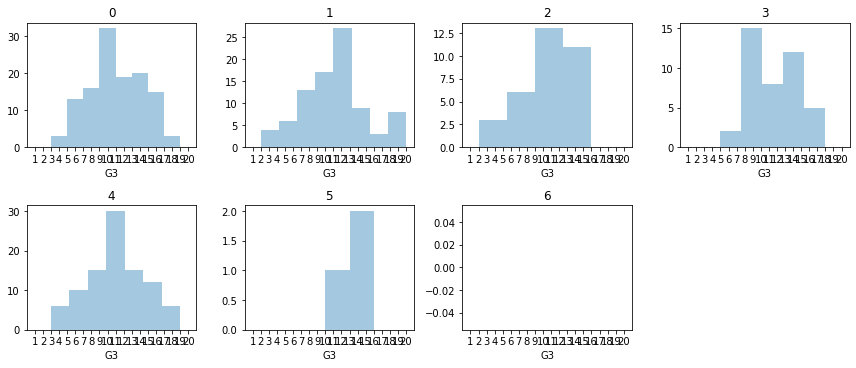

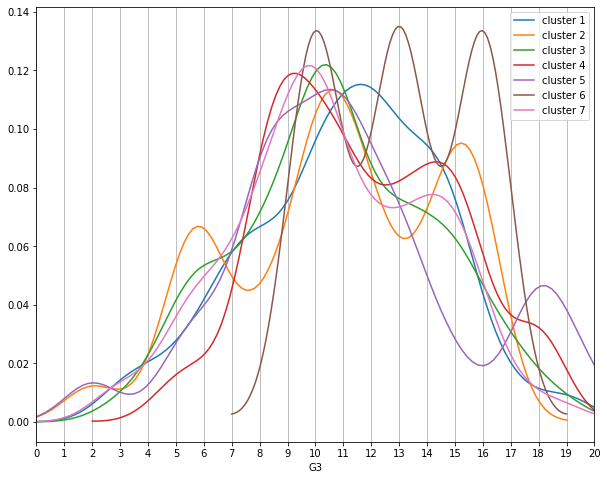

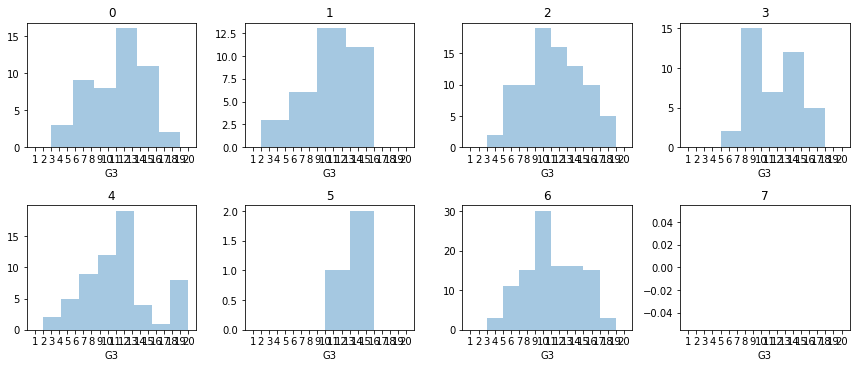

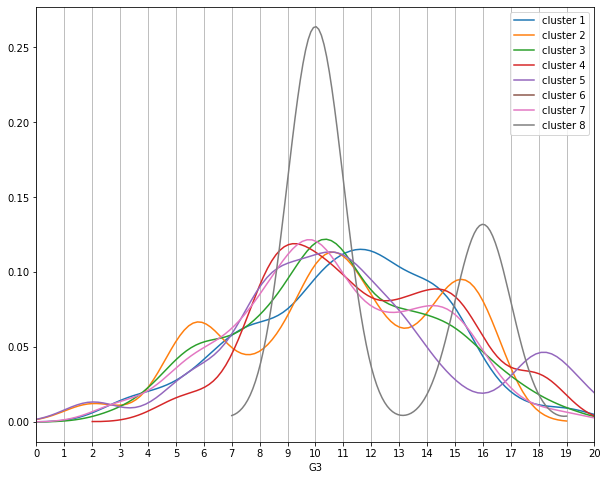

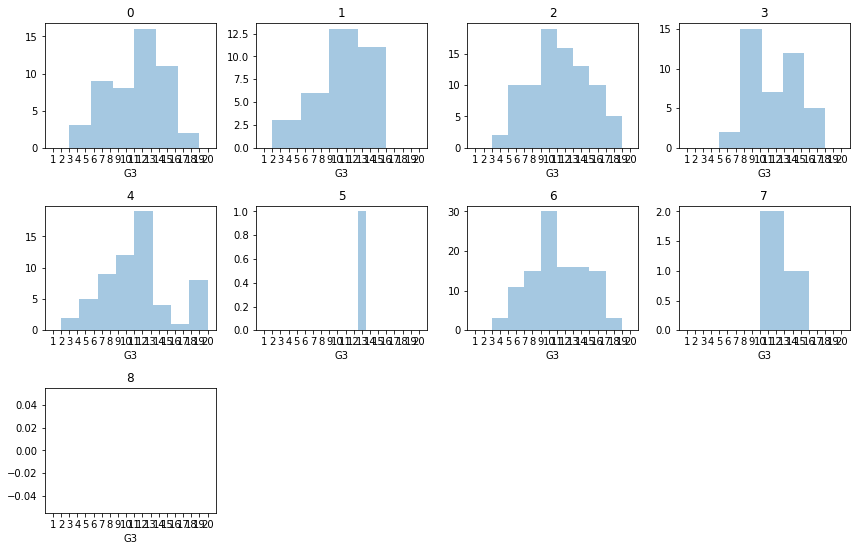

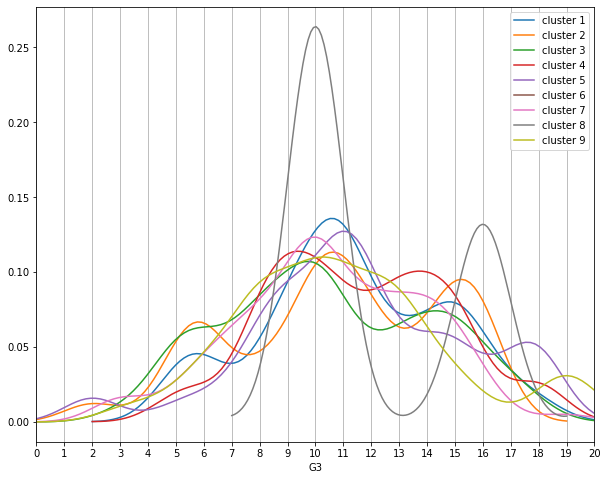

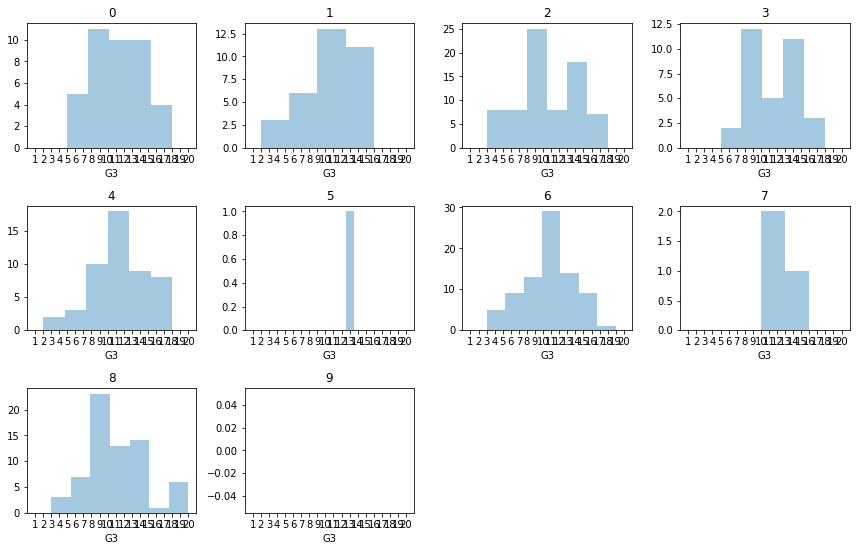

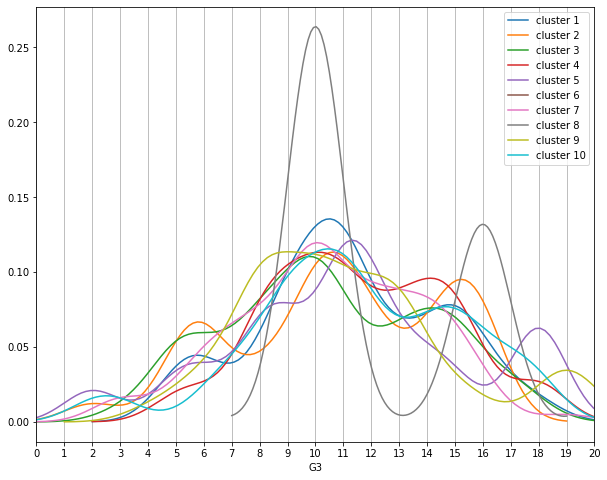

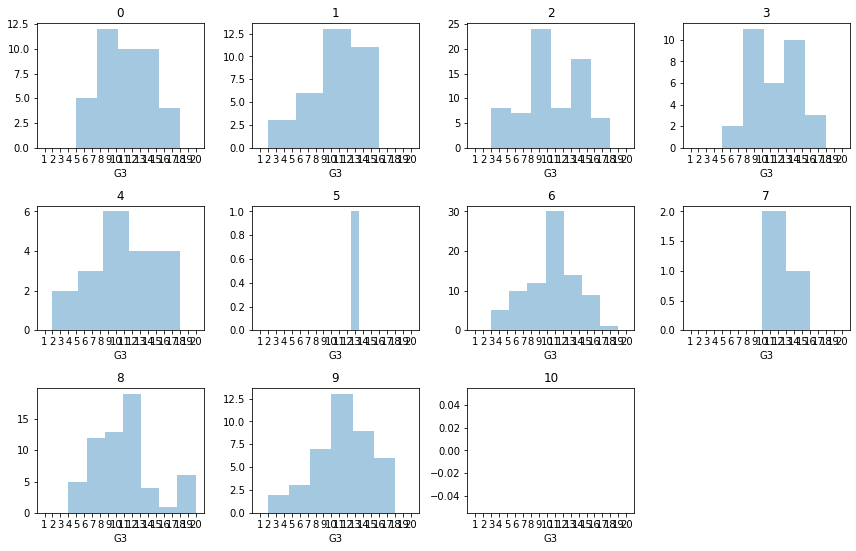

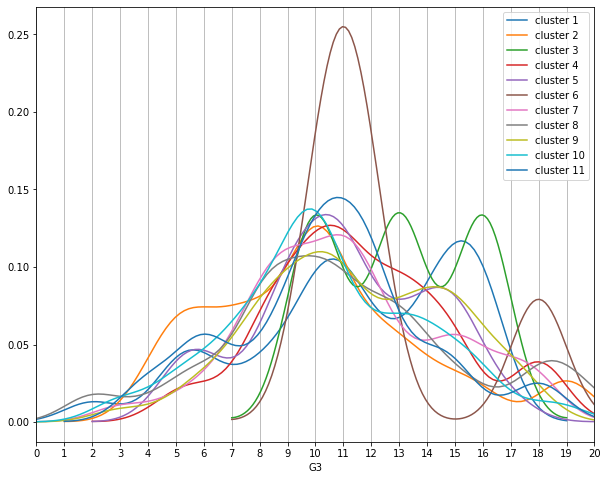

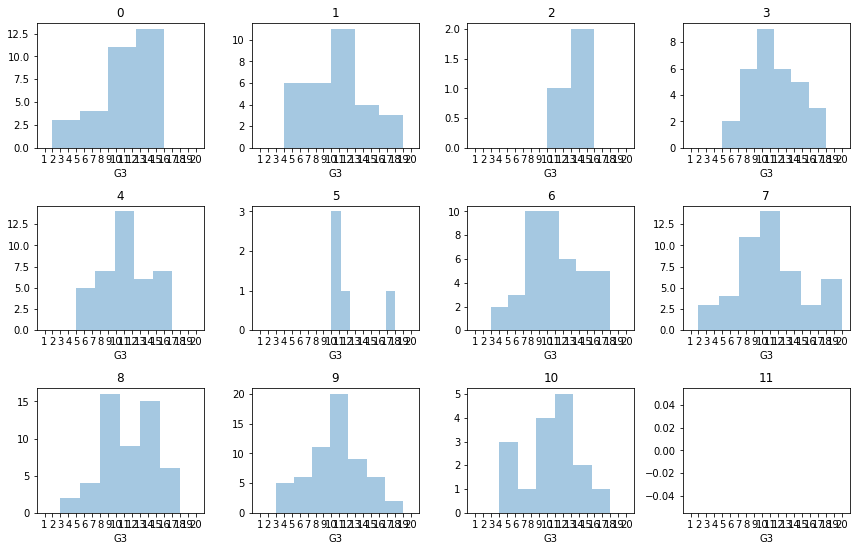

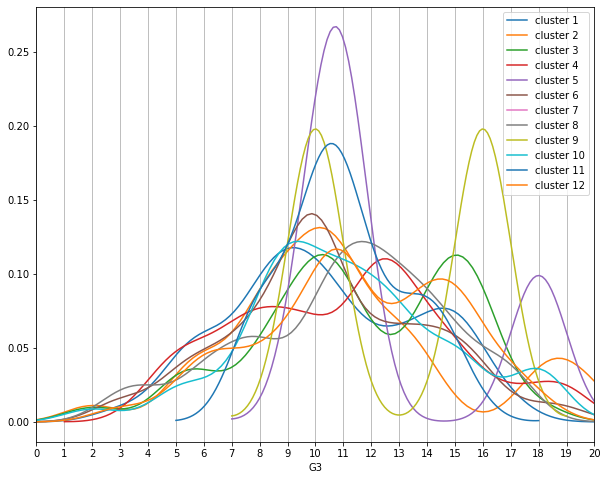

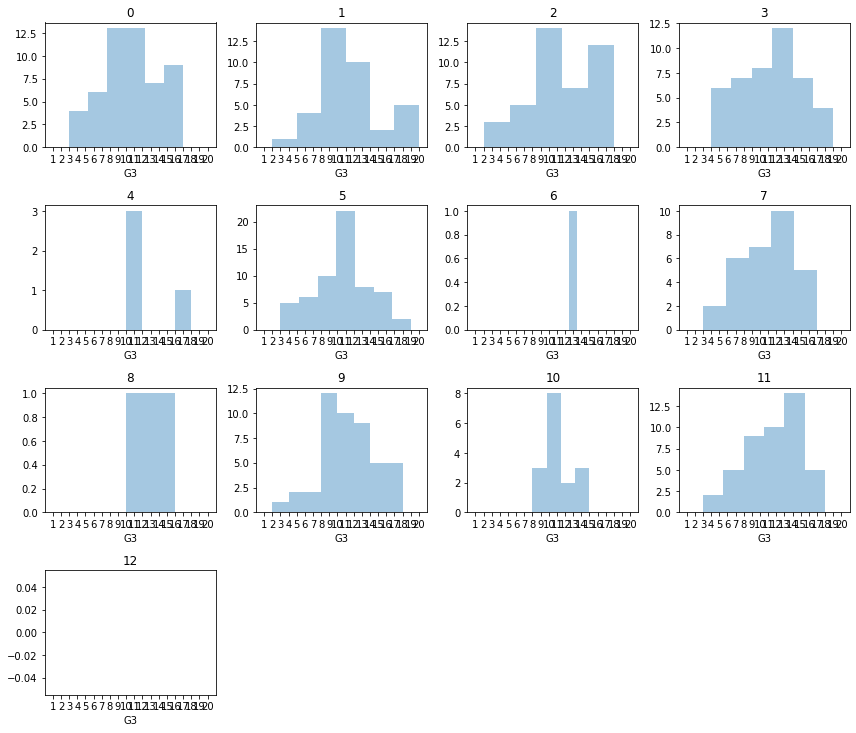

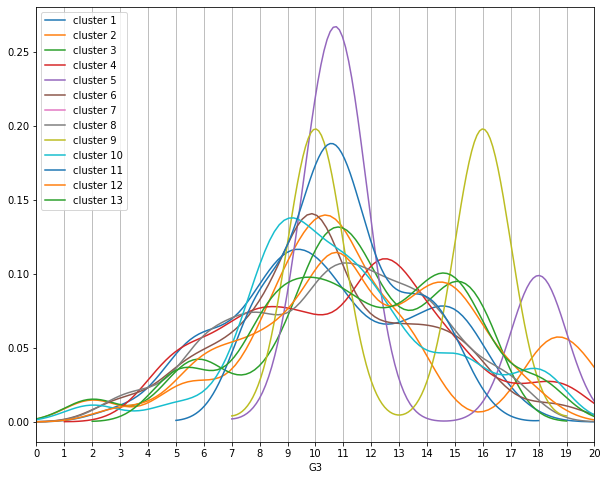

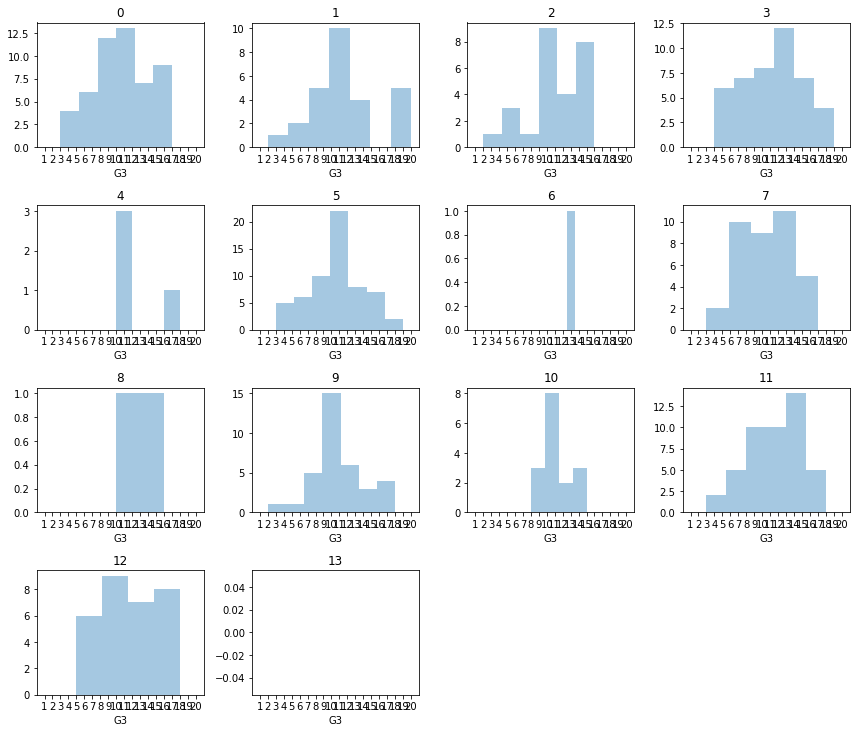

In [87]:
#Silhouette plots

range_n_clusters = range(2,15)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    
    
    y_KMclusters = pd.DataFrame(cluster_labels)

    y_KMclusters.columns = ['cluster']
    
    df_mat_one_hot_KMclusters = pd.concat([df_mat_one_hot,y_KMclusters],axis = 1)

    #print(df_mat_one_hot_KMclusters.head())

    #print(df_mat_one_hot_KMclusters['cluster'].value_counts().sort_index())
   
    df_mat_one_hot_KMclusters = one_hot(df_mat_one_hot_KMclusters, ["cluster"])


    df_mat_one_hot_sepclusters = []
    for i in range(1,n_clusters+1):
      df_mat_one_hot_sepclusters.append(df_mat_one_hot_KMclusters[df_mat_one_hot_KMclusters['cluster'] == i])
    #print(len(df_mat_one_hot_sepclusters))
    df_mat_one_hot_sepclusters[0]["G3"]


    fig = plt.figure(figsize = (10,8))

    ax = fig.gca()
    for i in range(len(df_mat_one_hot_sepclusters)):
      sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,20),label = 'cluster {}'.format(i+1))
    sns.distplot
    plt.xticks(np.arange(0,21))
    plt.xlim(0,20)
    ax.xaxis.grid(True)
    plt.legend();

    
    fig = plt.figure(figsize = (12,20))

    for i in range(len(df_mat_one_hot_sepclusters)):
    
      plt.subplot(8,4,i+1)
      ax = plt.gca()
      ax.set_title(i,fontsize = 12)
      ax.tick_params(axis = 'x')
      n_unique_values = 21


      sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],kde = False) #,fit = norm)
      plt.xticks(np.arange(1,21,1))
      plt.xlim(0,21);
    
    #plt.hist(df_por_histograms.iloc[:,i - 1],bins = n_unique_values)
      fig.tight_layout();




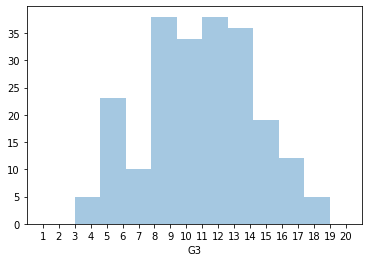

In [83]:
sns.distplot(df_mat_one_hot_sepclusters[0]['G3'],kde = False) #,fit = norm)
plt.xticks(np.arange(1,21,1))
plt.xlim(0,21);

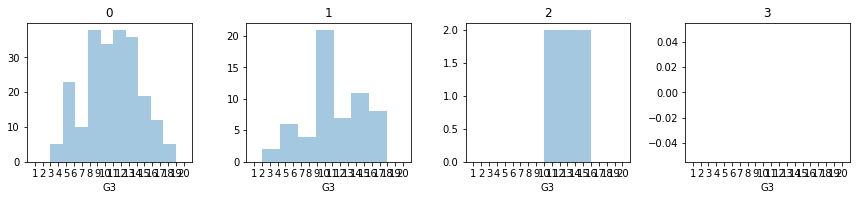

In [84]:
fig = plt.figure(figsize = (12,20))
for i in range(len(df_mat_one_hot_sepclusters)):
    
    plt.subplot(8,4,i+1)
    ax = plt.gca()
    ax.set_title(i,fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = 21


    sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],kde = False) #,fit = norm)
    plt.xticks(np.arange(1,21,1))
    plt.xlim(0,21);
    
    #plt.hist(df_por_histograms.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();

